Test Notebook to analyze the used car database from kaggle

In [1]:
#Import
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfused=pd.read_csv("C:/data/autos.csv")
#print(df1.head)
dfused.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
# let's get some idea of the contents of the data
counts = dfused.groupby('vehicleType').size(); 

counts.sort_values(ascending=False)

vehicleType
limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
dtype: int64

In [4]:
# We now want to understand the distribution of the data by brand

print(dfused.groupby('brand').size().sort_values(ascending=False))


brand
volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
dtype: int64


In [5]:
# Ok, how is the price different by model
pd.options.display.float_format = '{:,.0f}'.format
pd.pivot_table(dfused, index=['brand', 'model'], values=['price'], aggfunc=[np.mean, len])

mean    len
                           price  price
brand      model                       
alfa_romeo 145         1,484,515     50
           147             2,271    572
           156             1,514    629
           159             7,061    212
           andere          6,911    536
           spider          8,915    209
audi       100             1,776    417
           200             3,866     18
           80              1,426   1606
           90              5,203    104
           a1             14,204    622
           a2              3,843    373
           a3              7,665   6604
           a4              8,714  10257
           a5             22,086   1018
           a6             41,286   6023
           a8             10,080    582
           andere         19,222   1581
           q3             28,031    240
           q5             27,257    449
           q7             21,527    343
           tt             13,335   1325
bmw        1er            11,248   3837
           3er            15,543  20567
           5er            11,946   8546
           6er            20,640    258
           7er             8,949   1143
           andere         21,937    380
           i3              9,163     10
           m_reihe        30,041    358
...                          ...    ...
volkswagen andere          5,492    804
           beetle          7,357    859
           bora            2,450    872
           caddy           6,581   1648
           cc             17,304    194
           eos            11,463    536
           fox             2,849    744
           golf           19,477  30070
           jetta           7,180    377
           kaefer         28,461    471
           lupo            1,419   2594
           passat         24,208  10306
           phaeton        10,430    227
           polo            5,277  13092
           scirocco       11,209    638
           sharan          6,064   1556
           tiguan         17,244    916
           touareg        15,155    745
           touran          7,460   3540
           transporter    10,145   5528
           up              7,967    348
volvo      850             1,441    212
           andere          3,654    588
           c_reihe         8,357    198
           s60             6,788    152
           v40            17,464    782
           v50             5,981    255
           v60            16,490     48
           v70             4,331    645
           xc_reihe       15,015    338

[298 rows x 2 columns]

In [6]:
# let's now pare this dataset down a bit to look at only the top brands

# dfused[(dfused.yearOfRegistration >= 1990) & 
#                (dfused.yearOfRegistration < 2017)]
brands =['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault', 'peugeot']
dfused_suba = dfused[((dfused.brand  == 'volkswagen') |
                     (dfused.brand  == 'bmw') |
                    (dfused.brand  == 'opel') |
                    (dfused.brand  == 'mercedes_benz') |
                    (dfused.brand  == 'audi')) &
                    (dfused.yearOfRegistration >= 2006) &
                    (dfused.price <= 60000)]  

#pd.pivot_table(dfused_suba, index=['brand', 'model'], values=['price'], aggfunc=[np.mean, len], margins=True)

pd.pivot_table(dfused_suba, index=['brand'], values=['price'], aggfunc=[np.mean, len], margins=True)

,mean,len
,price,price
brand,,
audi,"14,804","14,850"
bmw,"14,238","15,484"
mercedes_benz,"14,619","11,775"
opel,"5,782","12,361"
volkswagen,"9,429","30,320"
All,"11,438","84,790"


In [98]:
dfused_suba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84790 entries, 1 to 371527
Data columns (total 20 columns):
dateCrawled            84790 non-null object
name                   84790 non-null object
seller                 84790 non-null object
offerType              84790 non-null object
price                  84790 non-null int64
abtest                 84790 non-null object
vehicleType            69068 non-null object
yearOfRegistration     84790 non-null int64
gearbox                81227 non-null object
powerPS                84790 non-null int64
model                  81777 non-null object
kilometer              84790 non-null int64
monthOfRegistration    84790 non-null int64
fuelType               77369 non-null object
brand                  84790 non-null object
notRepairedDamage      72422 non-null object
dateCreated            84790 non-null object
nrOfPictures           84790 non-null int64
postalCode             84790 non-null int64
lastSeen               84790 non-null obje

brand
audi             [[Axes(0.125,0.125;0.775x0.775)]]
bmw              [[Axes(0.125,0.125;0.775x0.775)]]
mercedes_benz    [[Axes(0.125,0.125;0.775x0.775)]]
opel             [[Axes(0.125,0.125;0.775x0.775)]]
volkswagen       [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

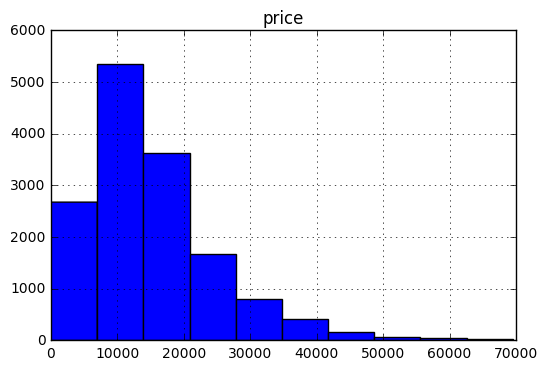

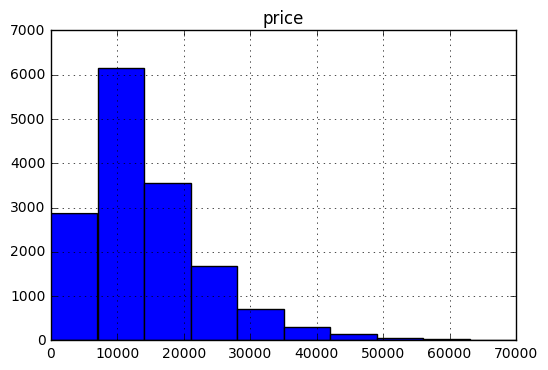

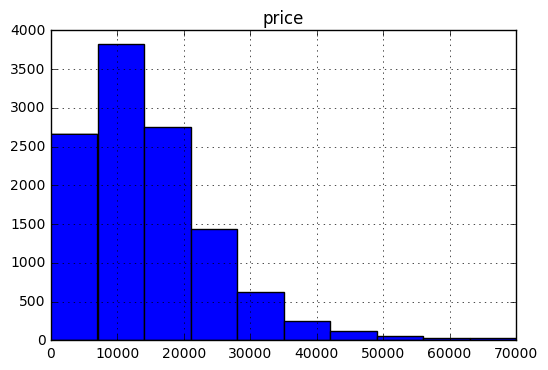

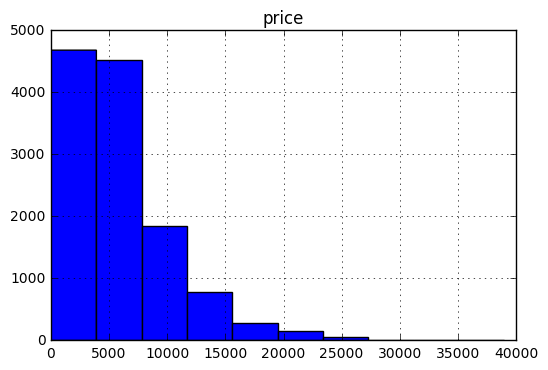

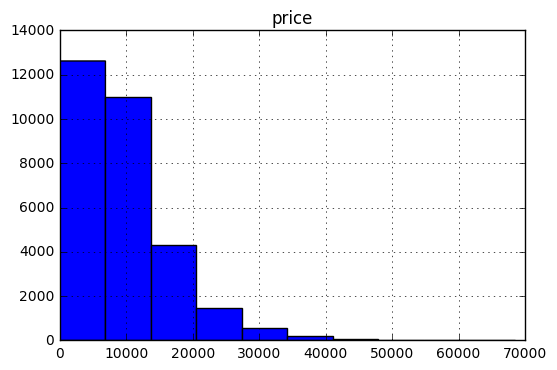

In [94]:
dfused_suba.groupby('brand').hist('price')

In [8]:
print(dfused_suba.groupby('offerType').size())

offerType
Angebot    84789
Gesuch         1
dtype: int64


In [14]:
print(dfused_suba.groupby('abtest').size())

abtest
control    50521
test       54777
dtype: int64


In [11]:
# Now let's look at only the meaningfule columns
df_sub = dfused_suba[['name', 'seller', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
                 'powerPS',  'model', 'kilometer', 'fuelType', 'brand', 'notRepairedDamage']]

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84790 entries, 1 to 371527
Data columns (total 12 columns):
name                  84790 non-null object
seller                84790 non-null object
price                 84790 non-null int64
vehicleType           69068 non-null object
yearOfRegistration    84790 non-null int64
gearbox               81227 non-null object
powerPS               84790 non-null int64
model                 81777 non-null object
kilometer             84790 non-null int64
fuelType              77369 non-null object
brand                 84790 non-null object
notRepairedDamage     72422 non-null object
dtypes: int64(4), object(8)
memory usage: 8.4+ MB


In [12]:
#What does the data frame now look like
df_sub.describe()

,price,yearOfRegistration,powerPS,kilometer
count,"84,790","84,790","84,790","84,790"
mean,"11,438","2,013",145,"113,207"
std,"8,908",124,200,"44,893"
min,0,"2,006",0,"5,000"
25%,"5,200","2,007",102,"80,000"
50%,"9,500","2,010",140,"125,000"
75%,"15,500","2,013",177,"150,000"
max,"60,000","9,999","19,211","150,000"


In [16]:
# Now eliminate rows with missing values

df_subClean = df_sub.dropna()
print(df_subClean.describe())

       price  yearOfRegistration  powerPS  kilometer
count 61,642              61,642   61,642     61,642
mean  13,623               2,009      160    107,255
std    8,712                   3      158     45,304
min        0               2,006        0      5,000
25%    7,490               2,007      110     70,000
50%   11,500               2,009      143    125,000
75%   17,500               2,011      184    150,000
max   60,000               2,018   17,322    150,000


In [17]:
df_subClean.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 61642 entries, 20 to 371527
Data columns (total 12 columns):
name                  61642 non-null object
seller                61642 non-null object
price                 61642 non-null int64
vehicleType           61642 non-null object
yearOfRegistration    61642 non-null int64
gearbox               61642 non-null object
powerPS               61642 non-null int64
model                 61642 non-null object
kilometer             61642 non-null int64
fuelType              61642 non-null object
brand                 61642 non-null object
notRepairedDamage     61642 non-null object
dtypes: int64(4), object(8)
memory usage: 6.1+ MB


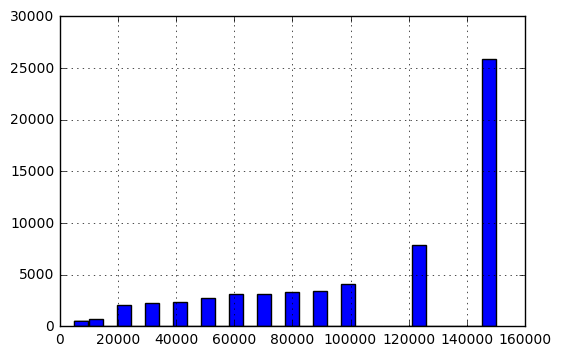

In [18]:
df_subClean['kilometer'].hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013FA4E80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E1872E8>]], dtype=object)

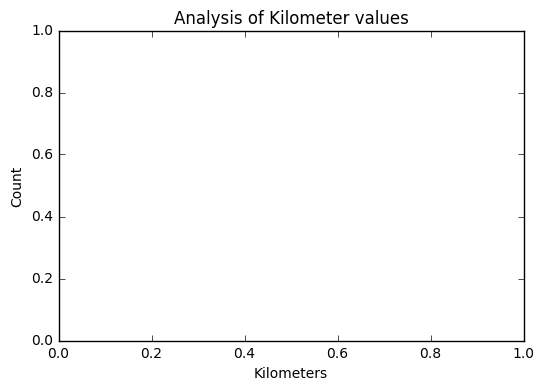

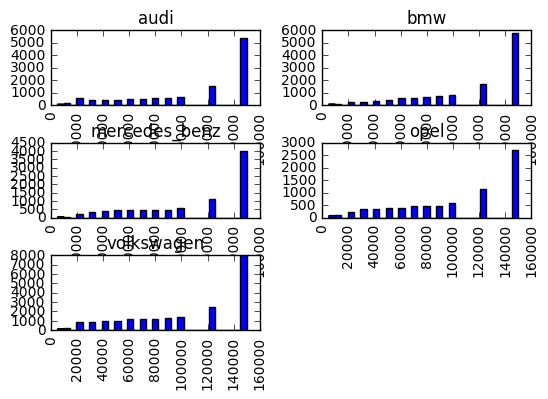

In [20]:
# I am subspicious of the kilometer values
%matplotlib inline
plt.figure()
plt.title('Analysis of Kilometer values')
plt.xlabel('Kilometers')
plt.ylabel('Count')
#df_subClean['kilometer'].hist(bins=30, by=df_subClean['vehicleType'])
df_subClean['kilometer'].hist(bins=30, by=df_subClean['brand'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A221C18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E7C9400>]], dtype=object)

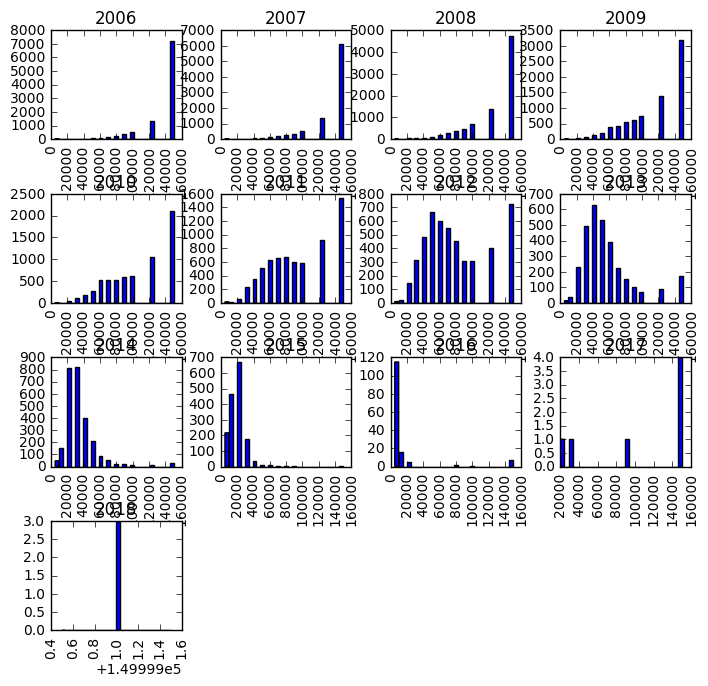

In [21]:
# What happens if we eliminat the high kilometer values
df_sublokil = df_subClean[(df_subClean.yearOfRegistration >= 2000 ) ]
df_sublokil['kilometer'].hist(bins=30, by=df_sublokil['yearOfRegistration'], figsize=(8, 8))

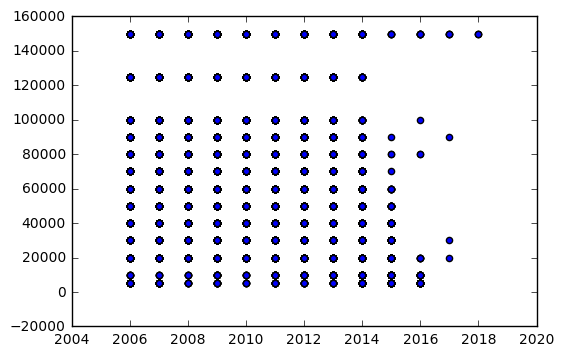

In [22]:
# is there a correlation between year of registration and kilometers
plt.scatter(df_subClean.yearOfRegistration, df_subClean.kilometer )

In [34]:
# Why do we still have older cars here?
df_subClean = df_subClean[(df_subClean.yearOfRegistration >= 1990) & 
                (df_subClean.yearOfRegistration < 2017)]

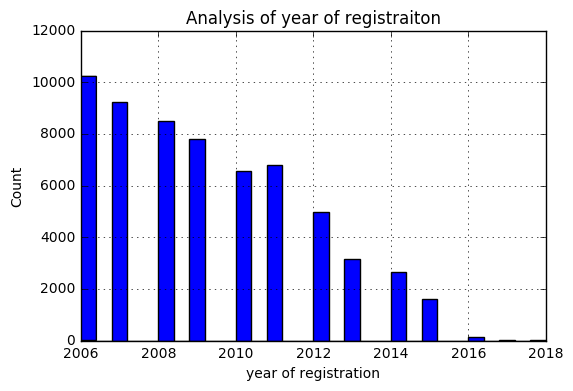

In [23]:
plt.figure()
plt.title('Analysis of year of registraiton')
plt.xlabel('year of registration')
plt.ylabel('Count')
df_subClean['yearOfRegistration'].hist(bins=30)

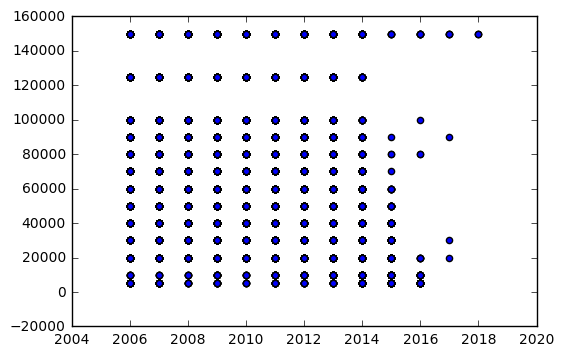

In [24]:
# is there a correlation between year of registration and kilometers
plt.scatter(df_subClean.yearOfRegistration, df_subClean.kilometer )

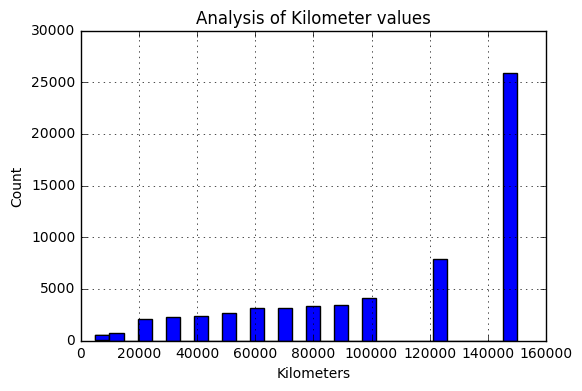

In [25]:
# Still no apparent corrrelation between year of registration and kilometer
# makes me think that the kilometer value is meaningless
plt.figure()
plt.title('Analysis of Kilometer values')
plt.xlabel('Kilometers')
plt.ylabel('Count')
df_subClean['kilometer'].hist(bins=30)

In [26]:
df_subClean['price'].groupby(df_subClean['fuelType']).describe()

fuelType       
andere    count        2
          mean     8,750
          std     12,374
          min          0
          25%      4,375
          50%      8,750
          75%     13,125
          max     17,500
benzin    count   24,983
          mean    13,005
          std      8,533
          min          0
          25%      7,000
          50%     10,900
          75%     16,500
          max     60,000
cng       count      229
          mean     6,953
          std      4,028
          min          0
          25%      4,500
          50%      5,990
          75%      8,650
          max     28,856
diesel    count   36,131
          mean    14,115
          std      8,811
          min          0
          25%      7,800
          50%     11,999
          75%     18,000
          max     60,000
elektro   count        6
          mean    13,022
          std     11,536
          min      1,642
          25%      5,300
          50%     10,900
          75%     15,975
         

In [27]:
df_subClean['price'].groupby(df_subClean['vehicleType']).describe()

vehicleType       
andere       count      205
             mean     9,946
             std      6,355
             min          0
             25%      5,900
             50%      8,330
             75%     13,000
             max     46,990
bus          count    7,175
             mean    12,545
             std      8,790
             min          0
             25%      6,499
             50%      9,800
             75%     16,000
             max     59,500
cabrio       count    3,936
             mean    17,991
             std      9,067
             min          0
             25%     11,900
             50%     16,500
             75%     22,600
             max     59,000
coupe        count    4,230
             mean    19,104
             std      9,905
             min          0
             25%     12,750
             50%     16,990
                      ...  
kleinwagen   std      4,356
             min          0
             25%      4,300
             50%      6,400
 

In [28]:
# how many records are now in df_subClean
df_subClean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61642 entries, 20 to 371527
Data columns (total 12 columns):
name                  61642 non-null object
seller                61642 non-null object
price                 61642 non-null int64
vehicleType           61642 non-null object
yearOfRegistration    61642 non-null int64
gearbox               61642 non-null object
powerPS               61642 non-null int64
model                 61642 non-null object
kilometer             61642 non-null int64
fuelType              61642 non-null object
brand                 61642 non-null object
notRepairedDamage     61642 non-null object
dtypes: int64(4), object(8)
memory usage: 6.1+ MB


In [90]:
#print(dfused.groupby('yearOfRegistration').size())
work_df = df_subClean[(df_subClean.yearOfRegistration >= 2000)  & 
                (df_subClean.model == 'golf') & (df_subClean.powerPS >= 70) 
                     & (df_subClean.vehicleType == 'limousine')]  
#print(work_df.groupby('fuelType').size())
work_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317 entries, 140 to 371455
Data columns (total 10 columns):
name                  2317 non-null object
price                 2317 non-null int64
vehicleType           2317 non-null object
yearOfRegistration    2317 non-null int64
gearbox               2317 non-null object
powerPS               2317 non-null int64
model                 2317 non-null object
kilometer             2317 non-null int64
fuelType              2317 non-null object
brand                 2317 non-null object
dtypes: int64(4), object(6)
memory usage: 199.1+ KB


In [91]:
work_df
# We no longer need vehicle type or year
work_df = work_df[['name', 'price', 'gearbox', 'powerPS', 'kilometer', 'fuelType']]
work_df.head(5)

,name,price,gearbox,powerPS,kilometer,fuelType
140,Verkaufe_ein_toppen_golf5,4300,manuell,90,150000,diesel
215,Volkswagen_Golf_1.4_Trendline,8500,manuell,80,50000,benzin
234,Volkswagen_Golf_V_1.4_Top_Zustand_*T�V*,2800,manuell,75,100000,benzin
302,Volkswagen_Golf_1.9_TDI_Comfortline,5500,manuell,90,150000,diesel
310,Volkswagen_Golf_1.4_Comfortline,4800,manuell,75,80000,benzin


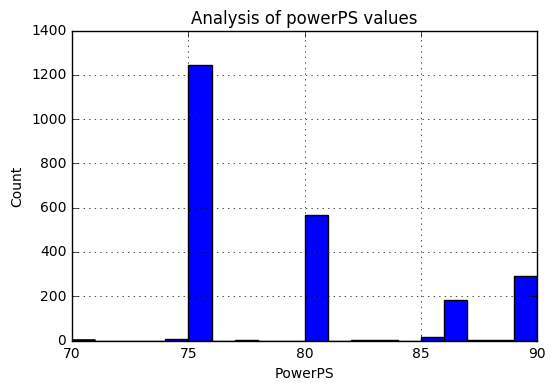

In [93]:
plt.figure()
plt.title('Analysis of powerPS values')
plt.xlabel('PowerPS')
plt.ylabel('Count')
work_df['powerPS'].hist(bins=20)

In [94]:
work_df.groupby(['powerPS', 'fuelType']).mean()

price      kilometer
powerPS fuelType                             
70      benzin     3799.500000  150000.000000
74      benzin     4450.000000  135000.000000
        diesel     2716.666667  150000.000000
75      benzin    11815.919250  135244.698206
        diesel     3984.000000  146428.571429
        lpg        2712.250000  150000.000000
77      benzin     2950.000000  150000.000000
        diesel     5900.000000  125000.000000
80      benzin     7013.612100   96930.604982
        lpg        5566.666667  130000.000000
82      benzin     4500.000000  150000.000000
83      benzin    10300.000000   50000.000000
85      benzin     8402.571429   90714.285714
86      benzin    12343.650273   41639.344262
        lpg        7250.000000   90000.000000
87      benzin    12500.000000   40000.000000
88      benzin     8096.666667  110000.000000
90      benzin     4073.185185  135123.456790
        diesel     3497.857143  143619.047619

In [97]:
print pd.crosstab([work_df.powerPS, work_df.gearbox], work_df.fuelType,  
                  margins=True)

fuelType           benzin  diesel  lpg   All
powerPS gearbox                             
70      manuell         2       0    0     2
74      automatik       0       1    0     1
        manuell         4       2    0     6
75      automatik       1       0    0     1
        manuell      1225       7   12  1244
77      manuell         2       1    0     3
80      manuell       562       0    3   565
82      manuell         1       0    0     1
83      manuell         1       0    0     1
85      manuell        14       0    0    14
86      automatik       3       0    0     3
        manuell       180       0    1   181
87      manuell         1       0    0     1
88      manuell         3       0    0     3
90      automatik       0      16    0    16
        manuell        81     194    0   275
All                  2080     221   16  2317


In [98]:
print pd.crosstab([work_df.powerPS, work_df.gearbox], work_df.price.mean(), margins=True)

col_0              9516.74277082   All
powerPS gearbox                       
70      manuell                2     2
74      automatik              1     1
        manuell                6     6
75      automatik              1     1
        manuell             1244  1244
77      manuell                3     3
80      manuell              565   565
82      manuell                1     1
83      manuell                1     1
85      manuell               14    14
86      automatik              3     3
        manuell              181   181
87      manuell                1     1
88      manuell                3     3
90      automatik             16    16
        manuell              275   275
All                         2317  2317


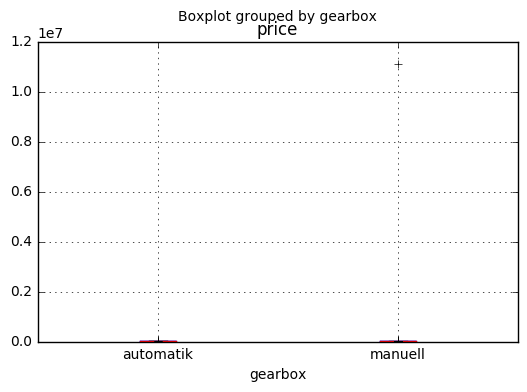

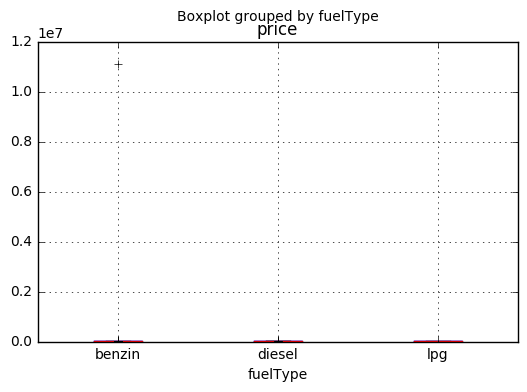

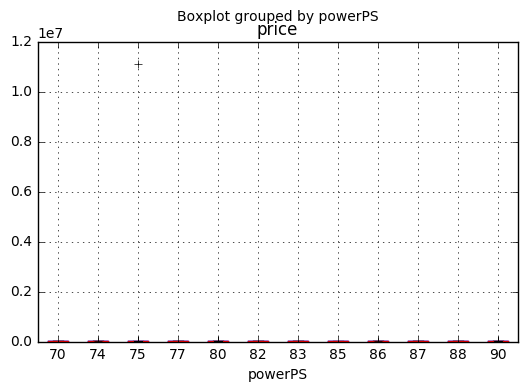

In [99]:
%matplotlib inline
bp = work_df.boxplot(column = 'price', by='gearbox')
ba = work_df.boxplot(column = 'price', by='fuelType')
ba = work_df.boxplot(column = 'price', by='powerPS')

In [100]:
work_df.groupby(['powerPS', 'fuelType']).mean()

price      kilometer
powerPS fuelType                             
70      benzin     3799.500000  150000.000000
74      benzin     4450.000000  135000.000000
        diesel     2716.666667  150000.000000
75      benzin    11815.919250  135244.698206
        diesel     3984.000000  146428.571429
        lpg        2712.250000  150000.000000
77      benzin     2950.000000  150000.000000
        diesel     5900.000000  125000.000000
80      benzin     7013.612100   96930.604982
        lpg        5566.666667  130000.000000
82      benzin     4500.000000  150000.000000
83      benzin    10300.000000   50000.000000
85      benzin     8402.571429   90714.285714
86      benzin    12343.650273   41639.344262
        lpg        7250.000000   90000.000000
87      benzin    12500.000000   40000.000000
88      benzin     8096.666667  110000.000000
90      benzin     4073.185185  135123.456790
        diesel     3497.857143  143619.047619

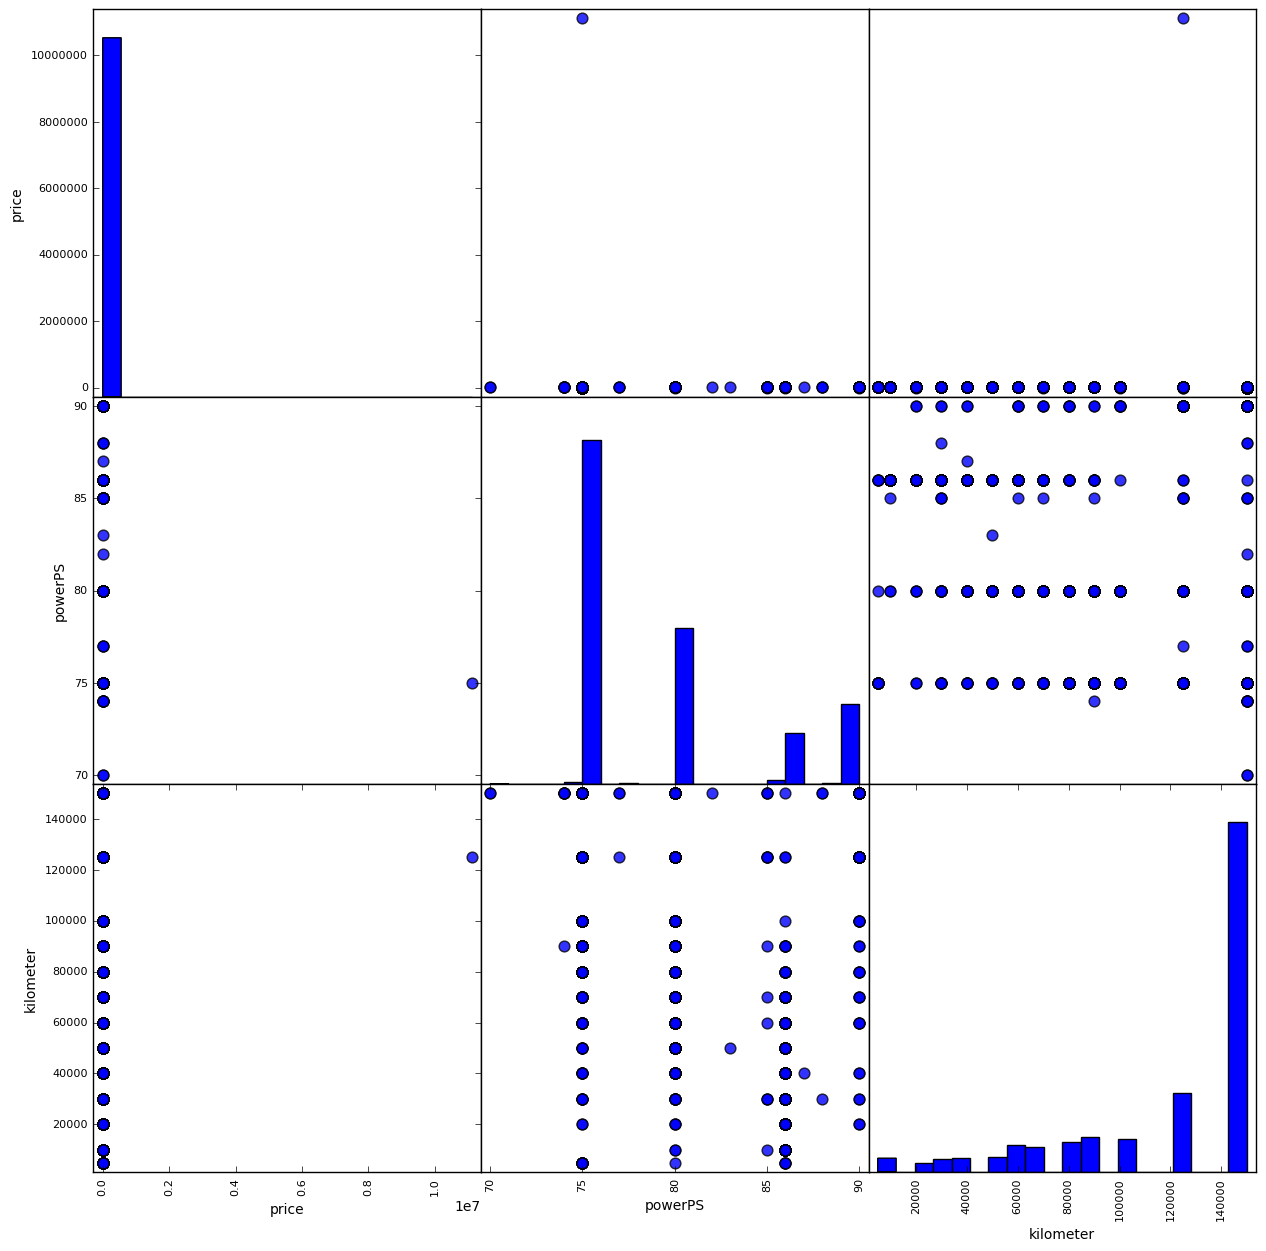

In [101]:

plot_data =pd.DataFrame(work_df)
grr = pd.scatter_matrix(work_df, figsize=(15,15), marker ='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8)

In [102]:
#Let's now get rid of some of the other variable
# look only at manual gas cars
work_df.head(5)
work_df = work_df[(work_df.fuelType == 'benzin') & (work_df.gearbox == 'manuell') & (work_df.powerPS == 86) ] 
             

work_df.describe()

#what does the data look like now
#plot_data =pd.DataFrame(work_df)
#grr = pd.scatter_matrix(work_df, figsize=(15,15), marker ='o',
#                       hist_kwds={'bins': 5}, s=60, alpha=.8)

,price,powerPS,kilometer
count,180.000000,180.0,180.000000
mean,12362.166667,86.0,41333.333333
std,2669.190961,0.0,26333.698699
min,0.000000,86.0,5000.000000
25%,9999.750000,86.0,20000.000000
50%,12324.500000,86.0,40000.000000
75%,14500.000000,86.0,60000.000000
max,18800.000000,86.0,150000.000000


In [39]:
work_df.describe()


,price,powerPS,kilometer
count,221.000000,221.000000,221.000000
mean,22412.004525,152.199095,17963.800905
std,6883.413321,57.910717,7944.040192
min,0.000000,85.000000,5000.000000
25%,16999.000000,110.000000,10000.000000
50%,21999.000000,150.000000,20000.000000
75%,27450.000000,184.000000,20000.000000
max,42999.000000,300.000000,50000.000000


In [8]:
#Let's get a subset of the data so the analysis is more meaningful
work_df = dfused[(dfused.yearOfRegistration == 2015) & 
                (dfused.model == 'golf') & (dfused.vehicleType == 'limousine')]  
print(work_df.groupby('model').size())
#print(work_df.groupby('name').size())
print(work_df.groupby('yearOfRegistration').size())
print(work_df.groupby('vehicleType').size())
print pd.crosstab([work_df.yearOfRegistration, work_df.gearbox], work_df.fuelType,  margins=True)

model
golf    221
dtype: int64
yearOfRegistration
2015    221
dtype: int64
vehicleType
limousine    221
dtype: int64
fuelType                      benzin  diesel  hybrid  All
yearOfRegistration gearbox                               
2015               automatik      48      35       1   84
                   manuell        92      44       0  136
All                              140      79       1  220


In [10]:
work15_df = dfused[(dfused.yearOfRegistration == 2015) & 
                (dfused.model == 'golf') & (dfused.vehicleType == 'limousine')]

print(work15_df.groupby('price').size())
work15_df.describe().transpose()
#Let's see if there is any relationship between attributes by analysing
#work_df.plot.scatter(x='price', y='yearOfRegistration', c='c', s=50)
#work_df.plot.hist(stacked=True, bins=20, columns=['price'])

price
0        1
275      1
487      1
10900    1
12900    1
13600    1
13790    1
14000    2
14190    1
14290    1
14299    1
14400    1
14500    1
14790    1
14800    1
14850    2
14900    4
14990    3
14999    1
15000    1
15200    1
15300    1
15400    1
15499    2
15500    2
15600    1
15800    1
15900    1
15950    3
15999    1
        ..
28899    1
28900    1
28990    2
29200    1
29500    1
29900    3
29998    1
30000    2
30400    1
30500    1
30800    2
30900    1
31000    1
31500    1
31900    2
32500    1
32900    1
33900    2
34499    1
34500    1
34950    1
35990    1
36500    1
36900    1
37500    1
37900    1
37990    1
40000    1
41999    1
42999    1
dtype: int64


,count,mean,std,min,25%,50%,75%,max
price,221.0,22412.004525,6883.413321,0.0,16999.0,21999.0,27450.0,42999.0
yearOfRegistration,221.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
powerPS,221.0,152.199095,57.910717,85.0,110.0,150.0,184.0,300.0
kilometer,221.0,17963.800905,7944.040192,5000.0,10000.0,20000.0,20000.0,50000.0
monthOfRegistration,221.0,3.714932,2.707767,0.0,2.0,3.0,5.0,12.0
nrOfPictures,221.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
postalCode,221.0,41819.755656,17096.366118,7973.0,31840.0,38440.0,40699.0,96465.0


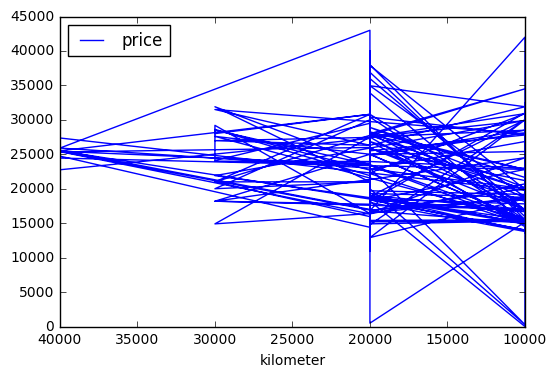

In [13]:

%matplotlib inline
work15_df.plot(x='kilometer', y='price')


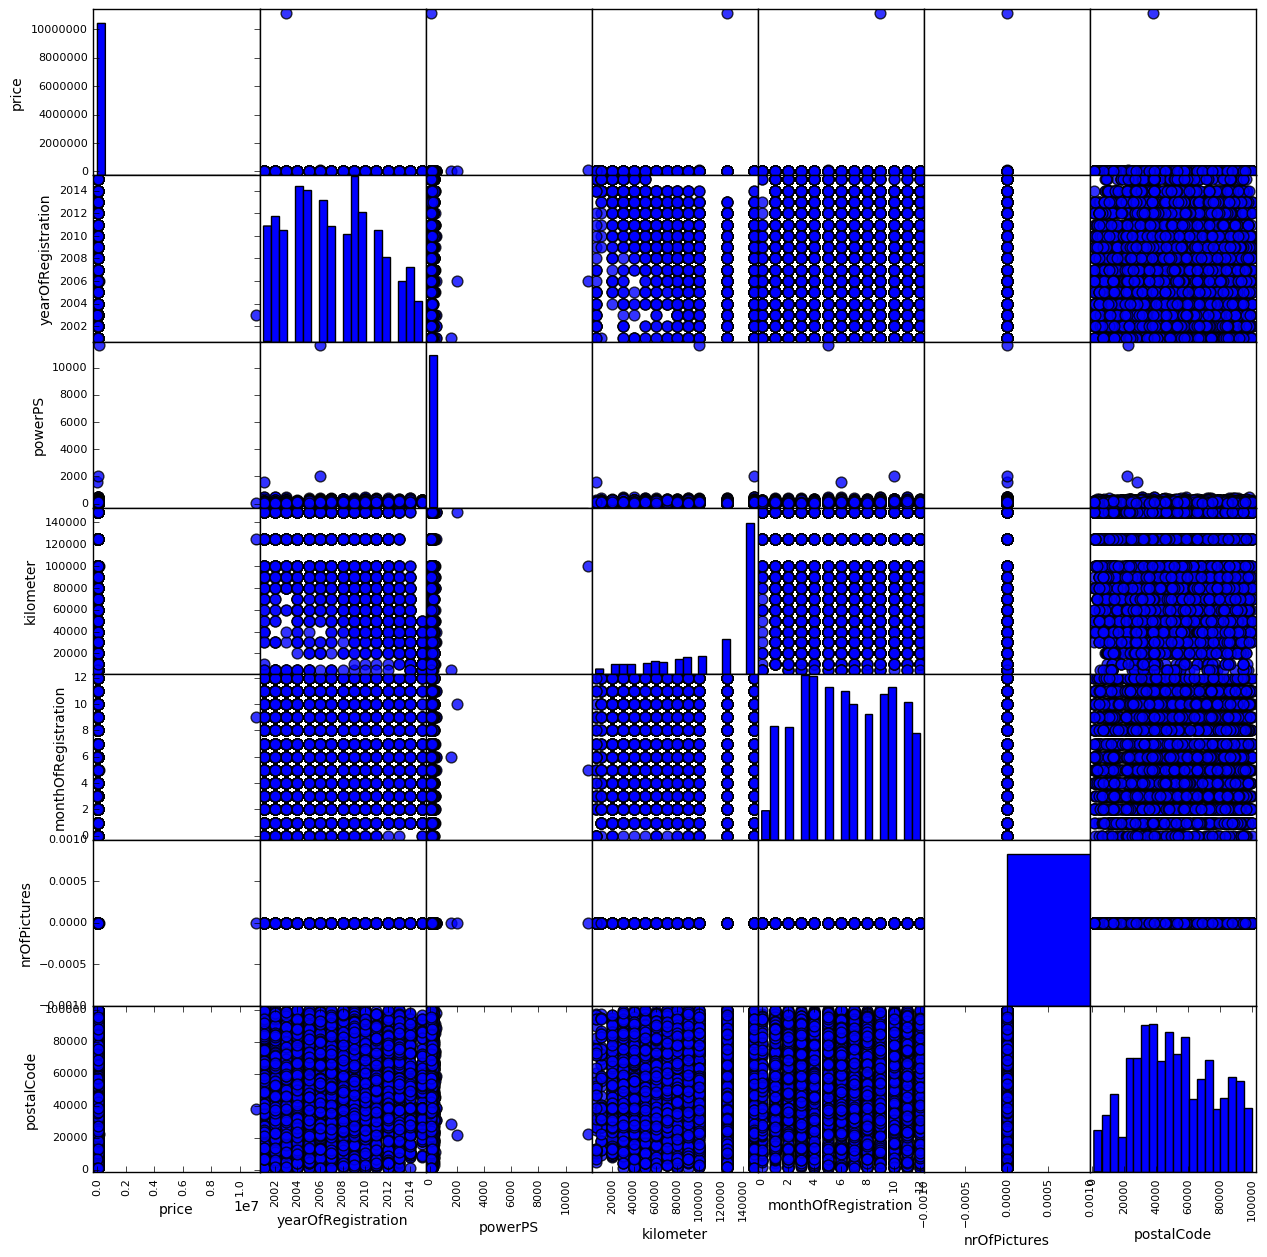

In [37]:
%matplotlib inline
plot_data =pd.DataFrame(work_df)
grr = pd.scatter_matrix(work_df, figsize=(15,15), marker ='o',
                       hist_kwds={'bins': 20}, s=60, alpha=.8)

In [6]:
print(dfused.groupby('model').size())

model
100              417
145               50
147              572
156              629
159              212
1_reihe         1306
1er             3837
200               18
2_reihe         4816
300c             148
3_reihe         3503
3er            20567
4_reihe          640
500              927
5_reihe          451
5er             8546
601              419
6_reihe         1291
6er              258
7er             1143
80              1606
850              212
90               104
900              117
9000              31
911              954
a1               622
a2               373
a3              6604
a4             10257
               ...  
toledo           343
touareg          745
touran          3540
transit          764
transporter     5528
tt              1325
tucson           239
twingo          4953
up               348
v40              782
v50              255
v60               48
v70              645
v_klasse         168
vectra          4255
verso            312
viano  

In [4]:
dfused.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [5]:
dfused.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
d